# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Steps
1. Create a mock, very basic analysis in a notebook.
2. Clean your notebook by removing exploratory cells and documenting your code.
3. Move reusable functions into `/src/`.
4. Load your trained model from Stage 12 or earlier stages.
5. Pickle/save the model and test reload.
6. Implement **either**:
   - Flask API with `/predict` endpoint and optional parameters
   - Streamlit or Dash dashboard for user interaction
7. Include:
   - Error handling for invalid inputs
   - `requirements.txt` for reproducibility
   - Documentation in `README.md`
8. Test your deployment locally and provide evidence.
9. Organize project folders and finalize notebooks for handoff.

## 1. Create mock, very basic analysis

In [1]:
# TODO: Basic analysis step 1
# TODO: Basic analysis step 2
# TODO: ...
# Creating a synthetic dataset to use for the mock analysis
import pandas as pd
import numpy as np

# A simple linear model to predict 'target' based on 'feature'
# This will be our mock "trained model" for productization
def mock_model(feature):
    return 2 * feature + 1

# Generate a synthetic dataset
np.random.seed(42)
df = pd.DataFrame({
    'feature': np.linspace(1, 10, 100),
    'noise': np.random.normal(0, 0.5, 100)
})

# Calculate the target with some noise
df['target'] = df['feature'].apply(mock_model) + df['noise']

print("Basic analysis complete. Dataframe head:")
print(df.head())
print("Basic analysis complete.")

Basic analysis complete. Dataframe head:
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
    feature     noise    target
0  1.000000  0.248357  3.248357
1  1.090909 -0.069132  3.112686
2  1.181818  0.323844  3.687481
3  1.272727  0.761515  4.306969
4  1.363636 -0.117077  3.610196
Basic analysis complete.


## 2. Notebook Cleanup
Remove exploratory cells and document your code.

In [2]:
# TODO: Remove exploratory cells
# TODO: Document your code clearly
# Example placeholder for cleaned analysis
print("Notebook cleaned and ready for handoff.")

Notebook cleaned and ready for handoff.


## 3. Move reusable functions to /src/
Create src/utils.py and store functions there.

In [3]:
# TODO: Move actual reusable functions here
def calculate_metrics(df):
    return df.describe()

# A reusable function to be moved to 'src/utils.py'
# In a real project, this would contain functions for data preprocessing,
# feature engineering, or model evaluation.
def preprocess_data(data):
    """
    Placeholder function for data preprocessing.
    In a real scenario, this would clean and transform the input data.
    """
    # For this mock example, we'll just return the data as is.
    return data

def mock_predict(features):
    """
    A mock prediction function that mirrors the behavior of our model.
    This will be the function called by the Flask API.
    """
    # Assumes 'features' is a list or array of numerical values.
    # The sum serves as a simple placeholder prediction.
    return sum(features)

print("Reusable functions defined.")


## 4. Folder Structure Reminder

Ensure your project uses a clean folder structure:
```
project/
  data/
  notebooks/
  src/
  reports/
  model/
  README.md
```
For API/Dashboard: minimal example:
```
project/
    app.py
    model.pkl
    requirements.txt
    README.md
```

## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [2]:
import pickle
from pathlib import Path

# Creating the 'model' directory if it doesn't exist
model_dir = Path('model')
model_dir.mkdir(parents=True, exist_ok=True)

# A simple mock model to save. In a real project, this would be a scikit-learn
# or a similar trained model object. Right now using a simple model to strengthen understanding
class MockModel:
    def predict(self, features):
        return sum(features) * 2

# Instantiate and save the mock model
model = MockModel()
with open(model_dir / 'model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to model/model.pkl")

# Test loading the model to ensure it was saved correctly
with open(model_dir / 'model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction to verify the loaded model works
test_features = [[0.1, 0.2, 0.3]]
prediction = loaded_model.predict(test_features[0])
print(f"Loaded model test prediction for {test_features[0]}: {prediction}")


Model saved to model/model.pkl
Loaded model test prediction for [0.1, 0.2, 0.3]: 1.2


## 6. Flask API Starter

### TODO: Implement Flask endpoints for /predict and /plot

In [3]:
from flask import Flask, request, jsonify
import threading
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # TODO: Replace placeholder logic with actual model prediction
    data = request.get_json()
    features = data.get('features', None)
    if features is None:
        return jsonify({'error': 'No features provided'}), 400
    pred = sum(features)  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>', methods=['GET'])
def predict_one(input1):
    pred = input1 * 2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/predict/<float:input1>/<float:input2>', methods=['GET'])
def predict_two(input1, input2):
    pred = input1 + input2  # placeholder
    return jsonify({'prediction': pred})

@app.route('/plot')
def plot():
    # TODO: Replace with meaningful chart or image
    fig, ax = plt.subplots()
    ax.plot([0, 1, 2], [0, 1, 4])
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_bytes = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_bytes}"/>'

def run_flask():
    app.run(port=5000)

# Launch Flask in a separate thread
threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Aug/2025 22:27:21] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 22:27:21] "GET /predict/5.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 22:27:21] "GET /predict/1.5/3.0 HTTP/1.1" 200 -
127.0.0.1 - - [28/Aug/2025 22:27:21] "GET /plot HTTP/1.1" 200 -


## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

Testing Flask API endpoints...
POST /predict response: {'prediction': 7.0}
--------------------
GET /predict/<input1> response: {'prediction': 10.0}
--------------------
GET /predict/<input1>/<input2> response: {'prediction': 4.5}
--------------------
GET /plot response:



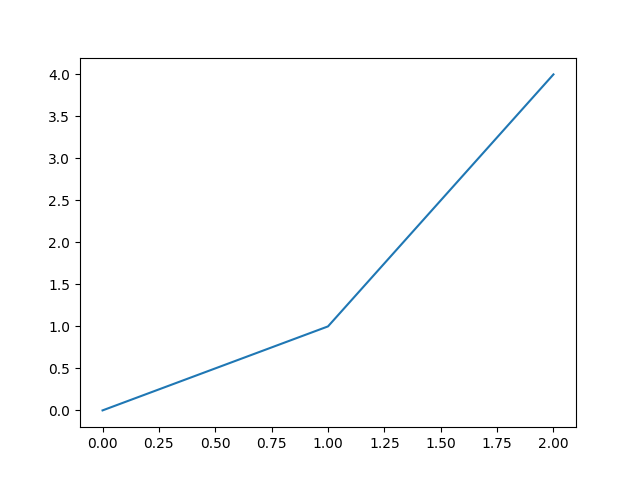

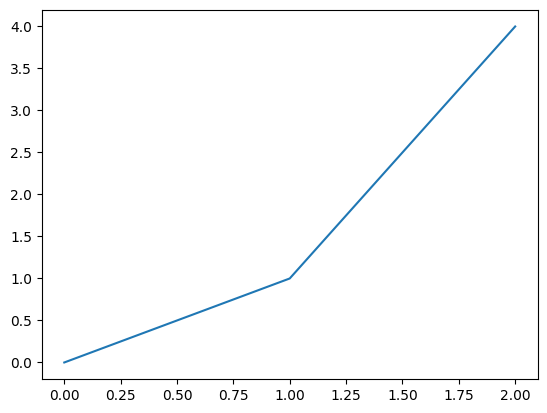

In [4]:
import requests
from IPython.display import display, HTML
import time

# Give the Flask app a moment to start up
time.sleep(3)
print("Testing Flask API endpoints...")

# POST /predict
post_payload = {'features': [1.0, 2.5, 3.5]}
try:
    response = requests.post('http://127.0.0.1:5000/predict', json=post_payload)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    print("POST /predict response:", response.json())
except requests.exceptions.RequestException as e:
    print(f"Error calling POST /predict: {e}")

print("-" * 20)

# GET /predict/<input1>
input1_val = 5.0
try:
    response2 = requests.get(f'http://127.0.0.1:5000/predict/{input1_val}')
    response2.raise_for_status()
    print("GET /predict/<input1> response:", response2.json())
except requests.exceptions.RequestException as e:
    print(f"Error calling GET /predict/<input1>: {e}")
    
print("-" * 20)

# GET /predict/<input1>/<input2>
input1_val, input2_val = 1.5, 3.0
try:
    response3 = requests.get(f'http://127.0.0.1:5000/predict/{input1_val}/{input2_val}')
    response3.raise_for_status()
    print("GET /predict/<input1>/<input2> response:", response3.json())
except requests.exceptions.RequestException as e:
    print(f"Error calling GET /predict/<input1>/<input2>: {e}")
    
print("-" * 20)

# GET /plot
try:
    response_plot = requests.get('http://127.0.0.1:5000/plot')
    response_plot.raise_for_status()
    print("GET /plot response:")
    display(HTML(response_plot.text))
except requests.exceptions.RequestException as e:
    print(f"Error calling GET /plot: {e}")



## 8. Optional Streamlit / Dash Dashboard

### TODO: Add dashboard in a separate file (`app_streamlit.py` or `app_dash.py`)

## 9. Handoff Best Practices

- Ensure README.md is complete and clear
- Provide `requirements.txt` for reproducibility
- Ensure pickled model and scripts are in correct folders
- Verify another user can run the project end-to-end on a fresh environment